https://github.com/nightrome/really-awesome-gan

In [16]:
import torch
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.autograd as autograd
import torch.optim as optim
import seaborn as sns

In [17]:
n,mean,sigma=1,4,1.25
input_size,hidden_size,output_size=1,50,1
batch_size=100
DLoss=[]
GLoss=[]

In [18]:
def g_input(m,n=1):
    return torch.rand(m,n)

def train_data(mean,sigma,n):
    return torch.FloatTensor(np.random.normal(mean,sigma,(n,1)))

In [19]:
class generator(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(generator,self).__init__()
        self.fc1=nn.Linear(input_size,hidden_size)
        self.elu=nn.ELU()
        self.fc2=nn.Linear(hidden_size,hidden_size)
        self.fc3=nn.Linear(hidden_size,output_size)
        self.sig=nn.Sigmoid()
    def forward(self,input):
        hid=self.elu(self.fc1(input))
        hid=self.sig(self.fc2(hid))
        out=self.fc3(hid)
        return out

In [20]:
class discriminator(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(discriminator,self).__init__()
        self.fc1=nn.Linear(input_size,hidden_size)
        self.elu=nn.ELU()
        self.fc2=nn.Linear(hidden_size,hidden_size)
        self.fc3=nn.Linear(hidden_size,output_size)
        self.sig=nn.Sigmoid()
    def forward(self,input):
        hid=self.elu(self.fc1(input))
        hid=self.elu(self.fc2(hid))
        out=self.fc3(hid)
        return self.sig(out)

In [21]:
D=discriminator(input_size,hidden_size,output_size)
G=generator(input_size,hidden_size,output_size)
D_optimizer=optim.Adam(D.parameters(),lr=2e-4,betas=(0.9,0.99))
G_optimizer=optim.Adam(G.parameters(),lr=2e-4,betas=(0.9,0.99))
criteria=nn.BCELoss(size_average=False)

In [22]:
for epoch in range(10000):
    for ix in range(2):
        # Discriminator Training
        D.zero_grad()
        inp=autograd.Variable(train_data(mean,sigma,batch_size))
        out=D(inp)
        fake_data=G(autograd.Variable(g_input(batch_size))).detach()
        d_loss1=criteria(D(fake_data),autograd.Variable(torch.zeros(batch_size,1)))
        d_loss1.backward()
        d_loss2 = criteria(out,autograd.Variable(torch.ones(batch_size,1)))
        DLoss.append(d_loss1.data.numpy()+d_loss2.data.numpy())
        d_loss2.backward()
        D_optimizer.step()
    for ix in range(1): 
        G.zero_grad()
        inp=autograd.Variable(g_input(batch_size))
        out=D(G(inp))
        g_loss=criteria(out,autograd.Variable(torch.ones(batch_size,1)))
        GLoss.append(g_loss.data.numpy())
        g_loss.backward()
        G_optimizer.step()    

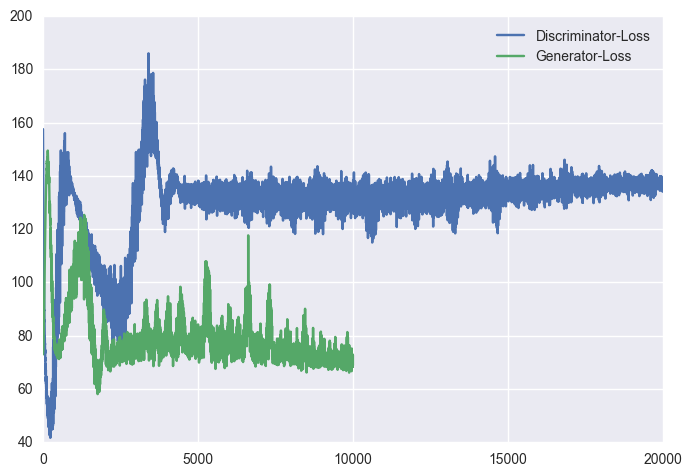

In [23]:
plt.plot(DLoss)
plt.plot(GLoss)
plt.legend(['Discriminator-Loss','Generator-Loss'])
plt.show()

In [24]:
inp=autograd.Variable(g_input(100))
print "Mean : ",torch.mean(G(inp)).data.numpy()[0]
print "Variance : ",torch.var(G(inp)).data.numpy()[0]

Mean :  4.03378
Variance :  1.02468


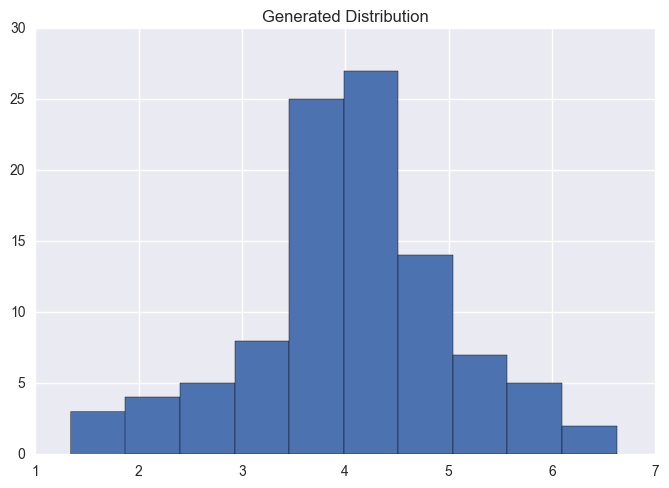

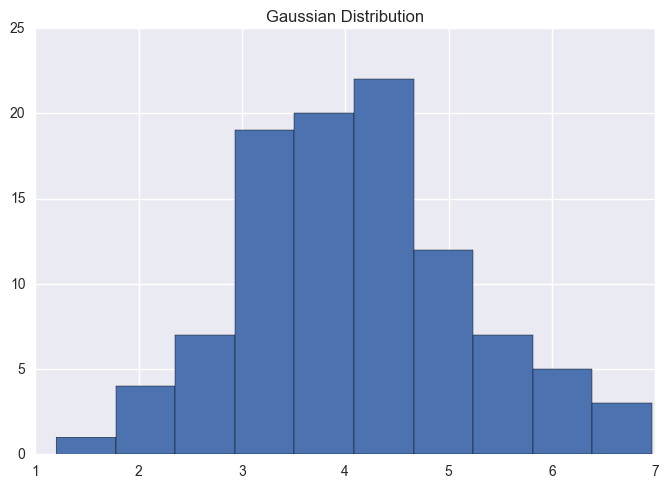

In [32]:
plt.title("Generated Distribution")
plt.hist(np.reshape(G(inp).data.numpy(),(100)))
plt.savefig("G.png")
plt.show()

plt.title("Gaussian Distribution")
plt.hist(np.random.normal(mean,sigma,100))
plt.savefig("Normal.png")
plt.show()
